In [121]:
import numpy as np
import pandas as pd
import warnings
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense
import matplotlib.pyplot as plt
import seaborn as sns

In [122]:
warnings.filterwarnings('ignore')

In [123]:
np.random.seed(0)
data_size = 200
features = np.random.rand(data_size, 2)
labels = (features[:, 0] + features[:, 1] > 1).astype(int)

In [124]:
df = pd.DataFrame(features, columns=['VisitDuration', 'PagesVisited'])
df['Purchase'] = labels

In [125]:
df.head()

,VisitDuration,PagesVisited,Purchase
0,0.548814,0.715189,1
1,0.602763,0.544883,1
2,0.423655,0.645894,1
3,0.437587,0.891773,1
4,0.963663,0.383442,1


In [126]:
x = df[['VisitDuration', 'PagesVisited']]
y = df['Purchase']

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [127]:
model = Sequential([
    Dense(10, activation='relu'),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=10, batch_size=10, validation_split=0.2)

Epoch 1/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.4196 - loss: 0.6834 - val_accuracy: 0.4688 - val_loss: 0.6346
Epoch 2/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4304 - loss: 0.6689 - val_accuracy: 0.5000 - val_loss: 0.6296
Epoch 3/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4461 - loss: 0.6629 - val_accuracy: 0.5000 - val_loss: 0.6253
Epoch 4/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4619 - loss: 0.6548 - val_accuracy: 0.5000 - val_loss: 0.6214
Epoch 5/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4760 - loss: 0.6464 - val_accuracy: 0.5312 - val_loss: 0.6175
Epoch 6/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5232 - loss: 0.6343 - val_accuracy: 0.5625 - val_loss: 0.6138
Epoch 7/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4708 - loss: 0.6460 - val_accuracy: 0.6250 - val_loss: 0.6103
Epoch 8/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5180 - loss: 0.6441 - val_accuracy: 0.6250 - val_loss

In [128]:
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Loss: {loss * 100}")
print(f"Test Accuracy: {accuracy * 100}")

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.6958 - loss: 0.5900
Test Loss: 58.49698781967163
Test Accuracy: 69.9999988079071


In [136]:
history_df = pd.DataFrame(history.history)

history_df.head()

,accuracy,loss,val_accuracy,val_loss
0,0.453125,0.667615,0.46875,0.634594
1,0.453125,0.661557,0.50000,0.629589
2,0.460938,0.656394,0.50000,0.625330
3,0.484375,0.651343,0.50000,0.621394
4,0.484375,0.646931,0.53125,0.617525


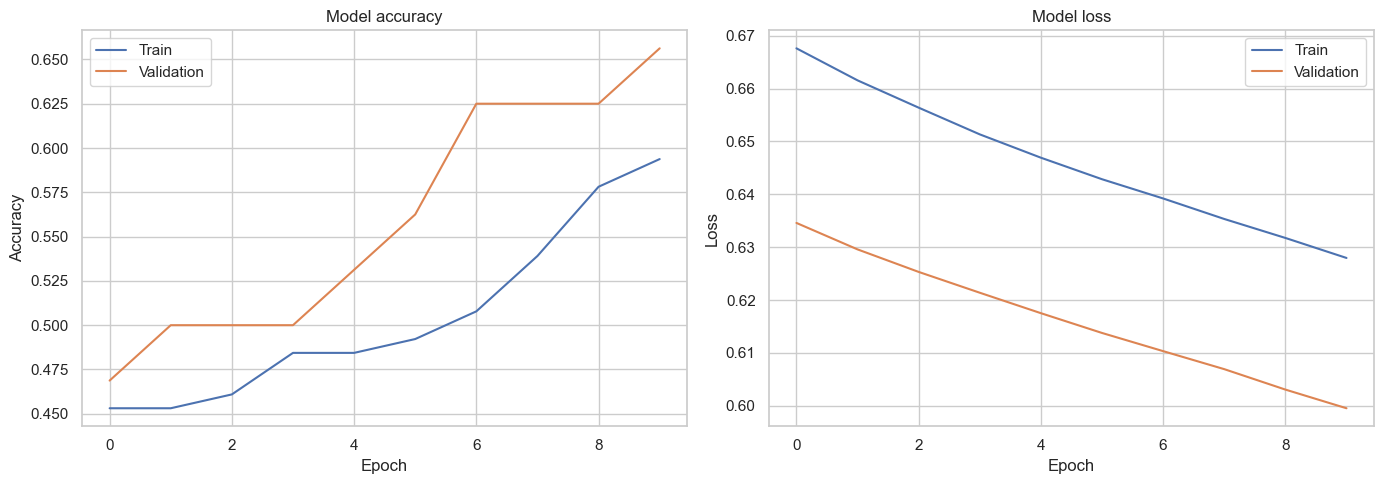

In [141]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

axes[0].plot(history_df['accuracy'], label='Train')
axes[0].plot(history_df['val_accuracy'], label='Validation')
axes[0].set_title('Model accuracy')
axes[0].set_xlabel('Epoch')
axes[0].set_ylabel('Accuracy')
axes[0].legend()

axes[1].plot(history_df['loss'], label='Train')
axes[1].plot(history_df['val_loss'], label='Validation')
axes[1].set_title('Model loss')
axes[1].set_xlabel('Epoch')
axes[1].set_ylabel('Loss')
axes[1].legend()

plt.tight_layout()
plt.show()

In [142]:
x_min, x_max = df['VisitDuration'].min() - 0.1, df['VisitDuration'].max() + 0.1
y_min, y_max = df['PagesVisited'].min() - 0.1, df['PagesVisited'].max() + 0.1

In [143]:
xx, yy = np.meshgrid(
    np.linspace(x_min, x_max, 300),
    np.linspace(y_min, y_max, 300)
)

In [144]:
grid_points = np.c_[xx.ravel(), yy.ravel()]
Z = model.predict(grid_points, verbose=0)
Z = Z.reshape(xx.shape)

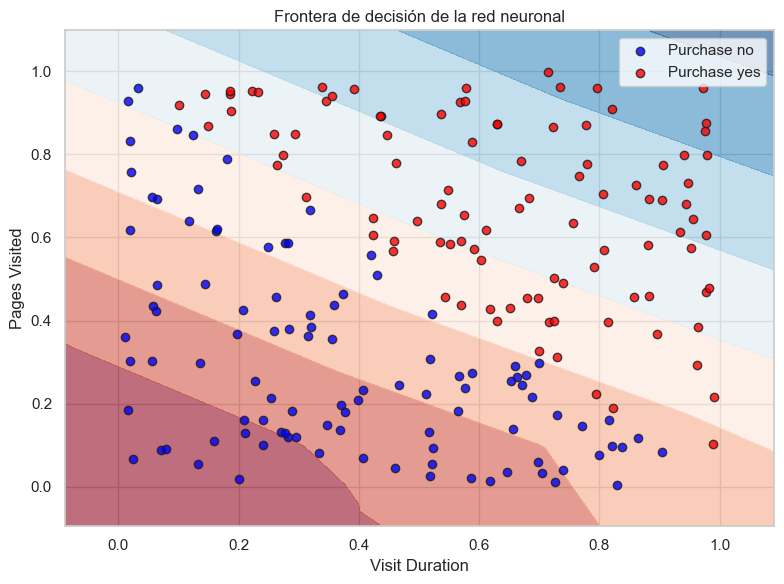

In [151]:
plt.figure(figsize=(8, 6))

plt.contourf(xx, yy, Z, alpha=0.6, cmap="RdBu")

plt.scatter(
    df[df['Purchase'] == 0]['VisitDuration'],
    df[df['Purchase'] == 0]['PagesVisited'],
    color='blue',
    edgecolor='k',
    alpha=0.8,
    label='Purchase no'
)

plt.scatter(
    df[df['Purchase'] == 1]['VisitDuration'],
    df[df['Purchase'] == 1]['PagesVisited'],
    color='red',
    edgecolor='k',
    alpha=0.8,
    label='Purchase yes'
)

plt.xlabel('Visit Duration')
plt.ylabel('Pages Visited')
plt.title('Frontera de decisión de la red neuronal')
plt.legend()
plt.tight_layout()
plt.show()
